# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [23]:
# here is a Python list:
import numpy as np
import pandas as pd

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
a[-3:]

# reverse the list
a[::-1]

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
[num ** 2 for num in a]

[1, 4, 9, 16, 25, 36]

In [25]:
# create a numpy array from this list
np.array(a) # change this

array([1, 2, 3, 4, 5, 6])

In [26]:
# find the mean of b
b.mean()

3.5

In [27]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
np.square(a)

array([ 1,  4,  9, 16, 25, 36], dtype=int32)

In [8]:
# change b from a length-6 list to a 2x3 matrix
b = np.reshape(a,[2,3])

In [10]:
# find the mean value of each row
mean = np.mean(b, axis = 1)

In [ ]:
# find the mean value of each column
mean = np.mean(b, axis = 0)

In [11]:
# find the third column of b
third = b[:,2]

[3 6]


In [6]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv("../data/starbucks_clean.csv")

In [7]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
average = df["calories"].mean()

In [8]:
# how many different categories of beverages are there?
print(len(df["beverage"].unique()))

33


In [9]:
# what is the average # calories for each beverage category?
groups = df.groupby("beverage")
groups["calories"].mean()

beverage
banana chocolate smoothie                              290.000000
brewed coffee                                            4.250000
caffè americano                                         13.750000
caffè latte                                            139.166667
caffè mocha (without whipped cream)                    210.000000
cappuccino                                              90.000000
caramel                                                150.000000
caramel (without whipped cream)                        268.888889
caramel apple spice (without whipped cream)            247.500000
caramel macchiato                                      184.166667
coffee                                                 210.000000
espresso                                                 7.500000
hot chocolate (without whipped cream)                  236.666667
iced brewed coffee (with classic syrup)                 93.333333
iced brewed coffee (with milk & classic syrup)         122.222222
j

In [10]:
# what beverage preparation includes the most sugar on average?
groups = df.groupby("beverage_prep")
groups["sugars "].mean()
# Whole milk has the most sugar on average

beverage_prep
2% Milk               30.980000
Doppio                 0.000000
Grande                20.000000
Grande Nonfat Milk    38.615385
Short                  8.250000
Short Nonfat Milk     17.000000
Solo                   0.000000
Soymilk               31.848485
Tall                  14.714286
Tall Nonfat Milk      28.521739
Venti                 27.714286
Venti Nonfat Milk     50.045455
Whole Milk            55.687500
Name: sugars , dtype: float64

In [11]:
# what is the average % daily value calcium content for each beverage?
groups = df.groupby("beverage")
groups["calcium "].mean()

beverage
banana chocolate smoothie                              20.000000
brewed coffee                                           0.500000
caffè americano                                         1.500000
caffè latte                                            35.000000
caffè mocha (without whipped cream)                    30.000000
cappuccino                                             22.500000
caramel                                                11.000000
caramel (without whipped cream)                        12.000000
caramel apple spice (without whipped cream)             0.000000
caramel macchiato                                      28.333333
coffee                                                 12.333333
espresso                                                0.000000
hot chocolate (without whipped cream)                  35.000000
iced brewed coffee (with classic syrup)                 0.000000
iced brewed coffee (with milk & classic syrup)          8.000000
java chip       

In [12]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
groups = df.groupby("beverage")
groups['protein '].max()
# Find the beverage with highest protein , which is banana chocalate smoothie
highest_protein = df[df['beverage'] == 'banana chocolate smoothie']
groups2 = highest_protein.groupby("beverage_prep")
groups2['calories'].min()
# Find its beverage preparation with lowest calories, which is with grande nonfat milk
# So our drink is a banana chocalate smoothie with grande nonfat milk

beverage_prep
2% Milk               300
Grande Nonfat Milk    280
Soymilk               290
Name: calories, dtype: int64

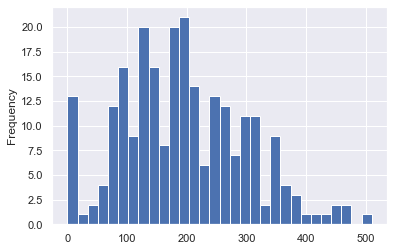

In [13]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt
df["calories"].plot.hist(bins=30)

In [16]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.set()
sns.displot(data=df, x="calories", bins=30)

AttributeError: module 'seaborn' has no attribute 'displot'

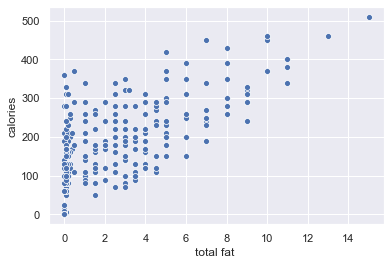

In [15]:
# plot calories against total fat using seaborn
sns.scatterplot(data=df, x="total fat ", y="calories")

Text(0.5, 1.0, 'distribution of calories in Short, Tall, Grande, and Venti drinks')

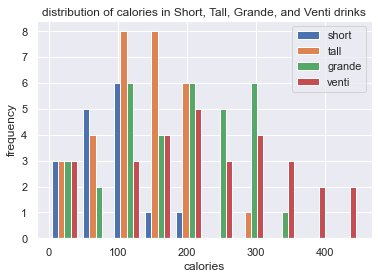

In [88]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.

short_options = ["Short", "Short Nonfat Milk"]
tall_options = ["Tall", "Tall Nonfat Milk"]
grande_options = ["Grande", "Grande Nonfat Milk"]
venti_options = ["Venti", "Venti Nonfat Milk"]

short_drinks = df[df['beverage_prep'].isin(short_options)]
tall_drinks = df[df['beverage_prep'].isin(tall_options)]
grande_drinks = df[df['beverage_prep'].isin(grande_options)]
venti_drinks = df[df['beverage_prep'].isin(venti_options)]

plt.hist([short_drinks["calories"], tall_drinks["calories"], grande_drinks["calories"], venti_drinks["calories"]], 
         label=['short', 'tall', 'grande', 'venti'])
plt.legend(loc='upper right')
plt.xlabel("calories")
plt.ylabel("frequency")
plt.title("Distribution of Calories in Short, Tall, Grande, and Venti drinks")
